<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
#i was installing all the required components and they took quite a lot of time.
#if you do not wait for downloading the resources, do view the equivalent GITHUB LINK
#https://github.com/khanfarhan10/coursera-ml-capstone-project/blob/master/ML_Project.ipynb
#Thanks for reviewing me!

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-09 18:17:08--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-05-09 18:17:08 (12.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

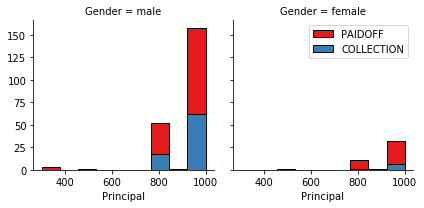

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

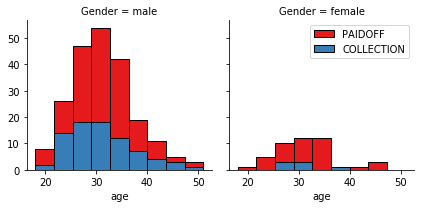

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

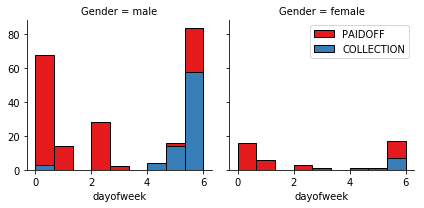

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature before One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets define feature sets, X:

In [84]:
X = Feature
X_full=Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [73]:
y = df['loan_status'].values
y_full=df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [74]:
target_labels=df['loan_status'].unique().tolist()
target_labels

['PAIDOFF', 'COLLECTION']

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [76]:
import warnings

#ignore FutureWarnings,DeprecationWarnings,DataConversionWarning
warnings.filterwarnings("ignore")

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.52,  0.92,  2.33, -0.42, -1.21, -0.38,  1.14, -0.87],
       [ 0.52,  0.92,  0.34,  2.38, -1.21,  2.62, -0.88, -0.87],
       [ 0.52, -0.96, -0.65, -0.42, -1.21, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.49,  2.38,  0.83, -0.38, -0.88,  1.15],
       [ 0.52,  0.92, -0.32, -0.42,  0.83, -0.38, -0.88,  1.15]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

In [85]:
#First,we keep a dictionary that measures all the losses/scores for our various models/classifiers
Test_Scores={}
Train_Scores={}

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [78]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 20+1
mean_acc = np.zeros((Ks-1))
mean_acc_train= np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
std_acc_train = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #gets the test accuracy
    y_pred=neigh.predict(X_train)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train,y_pred) #gets the train accuracy
    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    std_acc_train[n-1]=np.std(y_pred==y_train)/np.sqrt(y_pred.shape[0])

#print(mean_acc)
#print(mean_acc_train)

In [87]:
print("MEAN ACCURACY")
length=len(mean_acc)
for i in range(length):
    test_acc='{0:.3f}'.format(round(mean_acc[i],3))
    train_acc='{0:.3f}'.format(round(mean_acc_train[i],3))
    
    print("K=",f"{i+1:02d}","  Avg. Test Accuracy=",test_acc,"  Avg. Train Accuracy=",train_acc) 
#dont get scared by the code. its just for decoration XD

MEAN ACCURACY
K= 01   Avg. Test Accuracy= 0.671   Avg. Train Accuracy= 0.895
K= 02   Avg. Test Accuracy= 0.657   Avg. Train Accuracy= 0.822
K= 03   Avg. Test Accuracy= 0.714   Avg. Train Accuracy= 0.833
K= 04   Avg. Test Accuracy= 0.686   Avg. Train Accuracy= 0.815
K= 05   Avg. Test Accuracy= 0.757   Avg. Train Accuracy= 0.815
K= 06   Avg. Test Accuracy= 0.714   Avg. Train Accuracy= 0.801
K= 07   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.808
K= 08   Avg. Test Accuracy= 0.757   Avg. Train Accuracy= 0.797
K= 09   Avg. Test Accuracy= 0.757   Avg. Train Accuracy= 0.790
K= 10   Avg. Test Accuracy= 0.671   Avg. Train Accuracy= 0.775
K= 11   Avg. Test Accuracy= 0.700   Avg. Train Accuracy= 0.790
K= 12   Avg. Test Accuracy= 0.729   Avg. Train Accuracy= 0.783
K= 13   Avg. Test Accuracy= 0.700   Avg. Train Accuracy= 0.779
K= 14   Avg. Test Accuracy= 0.700   Avg. Train Accuracy= 0.768
K= 15   Avg. Test Accuracy= 0.686   Avg. Train Accuracy= 0.768
K= 16   Avg. Test Accuracy= 0.729   Avg. 

The best test accuracy was with 0.7857142857142857 with k= 7
The corresponding training accuracy obtained was : 0.8079710144927537


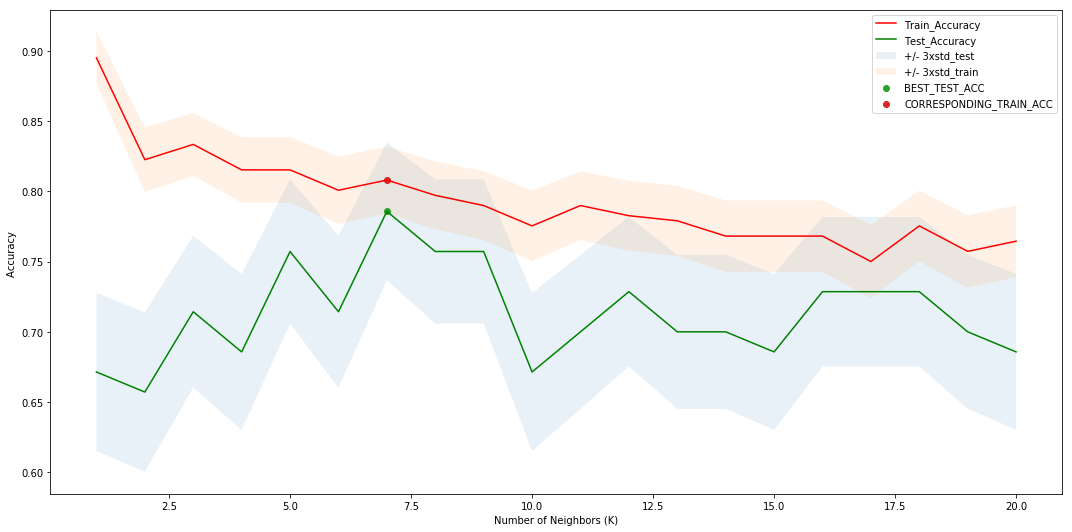

In [88]:
print( "The best test accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
print( "The corresponding training accuracy obtained was :",mean_acc_train[mean_acc.argmax()])

plt.figure(figsize=(15,7.5))
#comment the figure sizeif you want a small figure size
plt.plot(range(1,Ks),mean_acc_train,'r')
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc_train - 1 * std_acc_train,mean_acc_train + 1 * std_acc_train, alpha=0.10)


plt.scatter( mean_acc.argmax()+1,  mean_acc.max())
plt.scatter( mean_acc.argmax()+1,  mean_acc_train[mean_acc.argmax()])
#plt.annotate("BEST_TEST_ACC", ( mean_acc.argmax()+1,  mean_acc.max()))
#plt.annotate("CORRESPONDING_TRAIN_ACC", ( mean_acc.argmax()+1,  mean_acc_train[mean_acc.argmax()]))

plt.legend(('Train_Accuracy ','Test_Accuracy ', '+/- 3xstd_test','+/- 3xstd_train','BEST_TEST_ACC','CORRESPONDING_TRAIN_ACC'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#this plot clearly shows that initially the model does overfit

In [89]:
#Now evaluate the model based on metrics
#First import scoring methods
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score


#rescostruct the best model as last model is only saved. Previous models were overwritten
best_k=mean_acc.argmax()+1  #7
neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_train,y_train)
yhat=neigh.predict(X_test)
y_pred=neigh.predict(X_train)

#training scores
Train_Scores['KNN-jaccard']=jaccard_similarity_score(y_train, y_pred)
Train_Scores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')  
print("Train Scores")
print(Train_Scores)

#testing scores

Test_Scores['KNN-jaccard']=jaccard_similarity_score(y_test, yhat)
Test_Scores['KNN-f1-score']=f1_score(y_test, yhat, average='weighted') 
print("Test Scores")
print(Test_Scores)

Train Scores
{'KNN-jaccard': 0.8079710144927537, 'KNN-f1-score': 0.8000194668761034}
Test Scores
{'KNN-jaccard': 0.7857142857142857, 'KNN-f1-score': 0.7766540244416351}


In [90]:
#MODEL RECONSTRUCTION
#Now train on the complete data of training set!
#so that no data loss is encountered
#with the best model

best_k=mean_acc.argmax()+1  #7
neigh = KNeighborsClassifier(n_neighbors = best_k).fit(X_full,y_full)
#yhat=neigh.predict(X_test)
#y_pred=neigh.predict(X_train)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=3)

#criterion{“gini”, “entropy”},
#splitter{“best”, “random”}, default=”best”

#default criterion is gini, setting random state helps in reproducing these experiments
loanTree # it shows the applied parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [95]:
loanTree.fit(X_train, y_train)
y_pred=loanTree.predict(X_train)

y_pred_test=loanTree.predict(X_test)

from sklearn import metrics
import matplotlib.pyplot as plt

print("Decision Trees's Training Accuracy: ", metrics.accuracy_score(y_train, y_pred))
print("Decision Trees's Testing Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))


#training scores
Train_Scores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted') 
Train_Scores['Tree-jaccard']=jaccard_similarity_score(y_train, y_pred)
print("Train Scores")
print(Train_Scores)

#testing scores
Test_Scores['Tree-f1-score']=f1_score(y_test, y_pred_test, average='weighted') 
Test_Scores['Tree-jaccard']=jaccard_similarity_score(y_test, y_pred_test)
print("Test Scores")
print(Test_Scores)

Decision Trees's Training Accuracy:  0.7463768115942029
Decision Trees's Testing Accuracy:  0.6142857142857143
Train Scores
{'KNN-jaccard': 0.8079710144927537, 'KNN-f1-score': 0.8000194668761034, 'Tree-f1-score': 0.757416213768116, 'Tree-jaccard': 0.7463768115942029}
Test Scores
{'KNN-jaccard': 0.7857142857142857, 'KNN-f1-score': 0.7766540244416351, 'Tree-f1-score': 0.6445993031358885, 'Tree-jaccard': 0.6142857142857143}


In [32]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

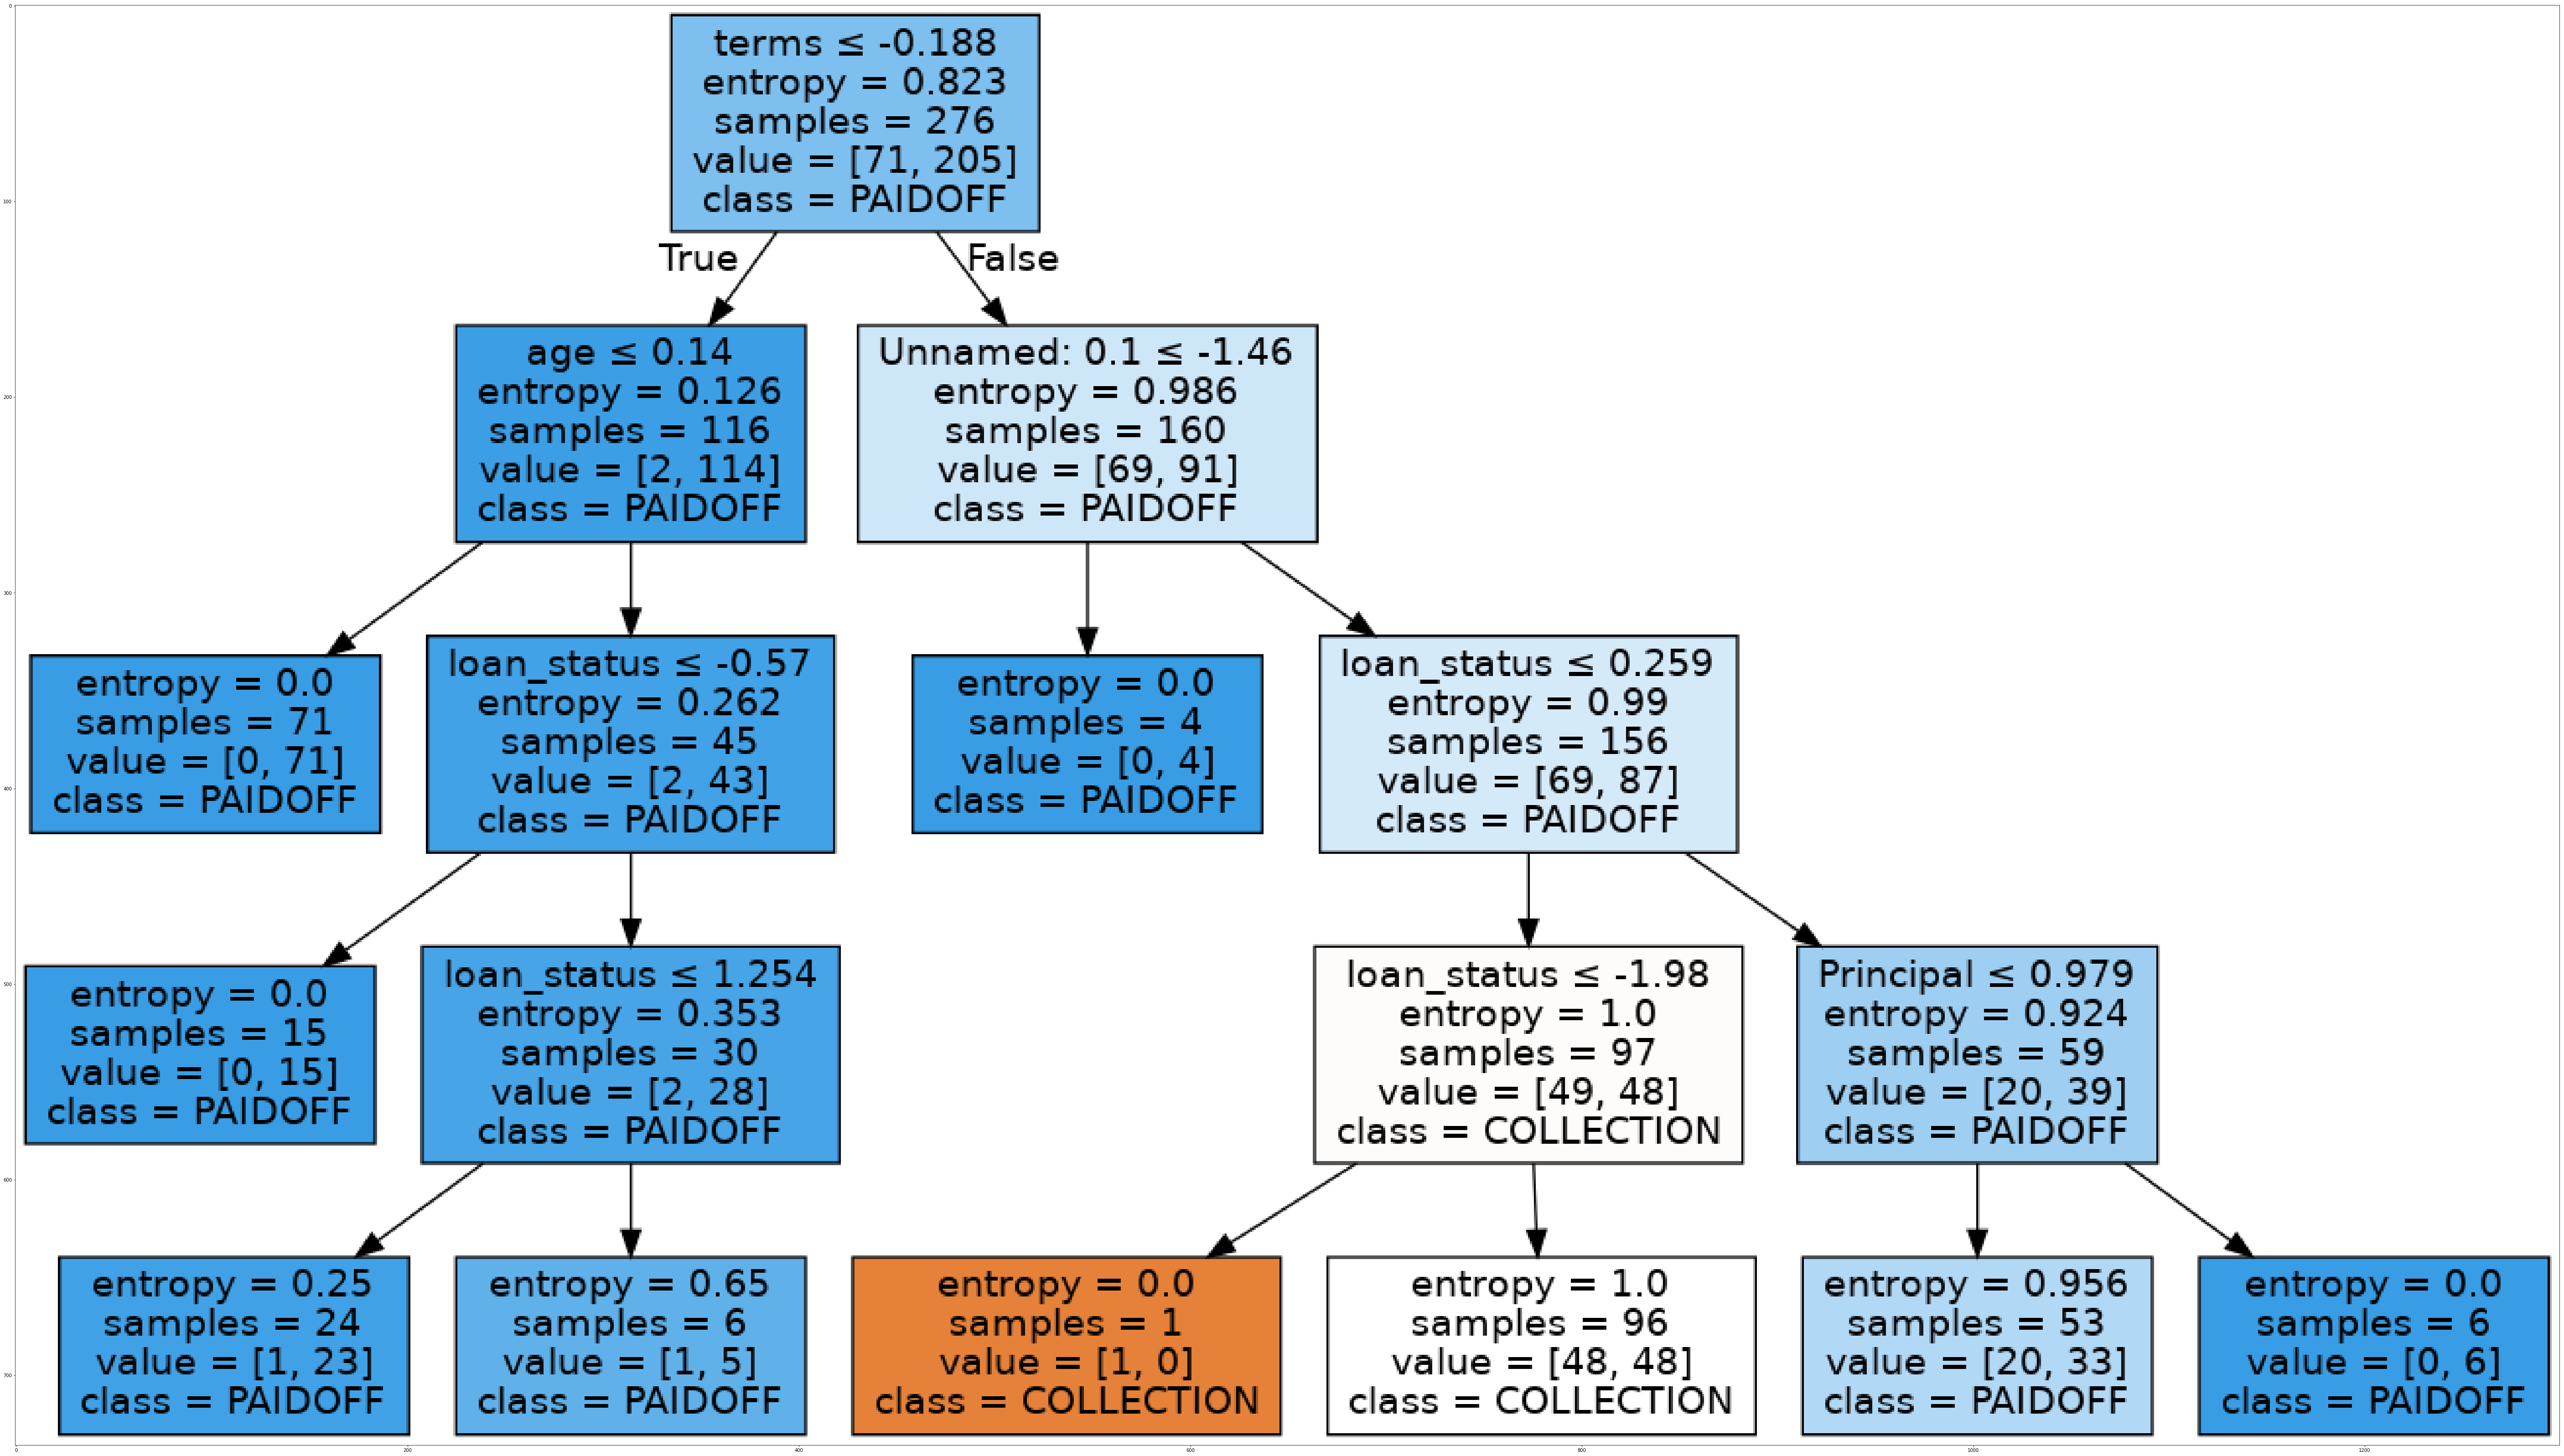

In [33]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


dot_data = StringIO()
filename = "loanTree.png"

featureNames = df.columns[0:8]
targetNames = df['loan_status'].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [96]:
#MODEL RECONSTRUCTION
#For no loss (20% test data was never used for training)
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=3)
loanTree.fit(X_full, y_full)
#y_pred=loanTree.predict(X_train)

#y_pred_test=loanTree.predict(X_test)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

# Support Vector Machine

In [97]:
#I did some research for all the kernel types that SVM in scikit-learn provides!
#I decided to try them all!!!




from sklearn.metrics import classification_report, confusion_matrix
import itertools

KERNEL_TYPES=['poly','linear','rbf','sigmoid']
from sklearn import svm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [114]:
length=len(KERNEL_TYPES)
mean_acc = np.zeros(length)
mean_acc_train= np.zeros(length)
std_acc = np.zeros(length)
std_acc_train = np.zeros(length)
ConfustionMx = []
for n in range(length):
    KERNEL_TYPE=KERNEL_TYPES[n]
    #Train Model and Predict  
    clf = svm.SVC(kernel=KERNEL_TYPE,degree=8,random_state=3)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #gets the test accuracy
    y_pred=clf.predict(X_train)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train,y_pred) #gets the train accuracy
    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    std_acc_train[n-1]=np.std(y_pred==y_train)/np.sqrt(y_pred.shape[0])


In [115]:
print("MEAN ACCURACY")
length=len(list(mean_acc))
for i in range(length):
    test_acc='{0:.3f}'.format(round(mean_acc[i],3))
    train_acc='{0:.3f}'.format(round(mean_acc_train[i],3))
    
    print("TYPE=",KERNEL_TYPES[i],"  Avg. Test Accuracy=",test_acc,"  Avg. Train Accuracy=",train_acc) 


MEAN ACCURACY
TYPE= poly   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.743
TYPE= linear   Avg. Test Accuracy= 0.743   Avg. Train Accuracy= 0.783
TYPE= rbf   Avg. Test Accuracy= 0.743   Avg. Train Accuracy= 0.710
TYPE= sigmoid   Avg. Test Accuracy= 0.729   Avg. Train Accuracy= 0.786


The best test accuracy was with 0.7857142857142857 with Type= poly
The corresponding training accuracy obtained was : 0.7427536231884058


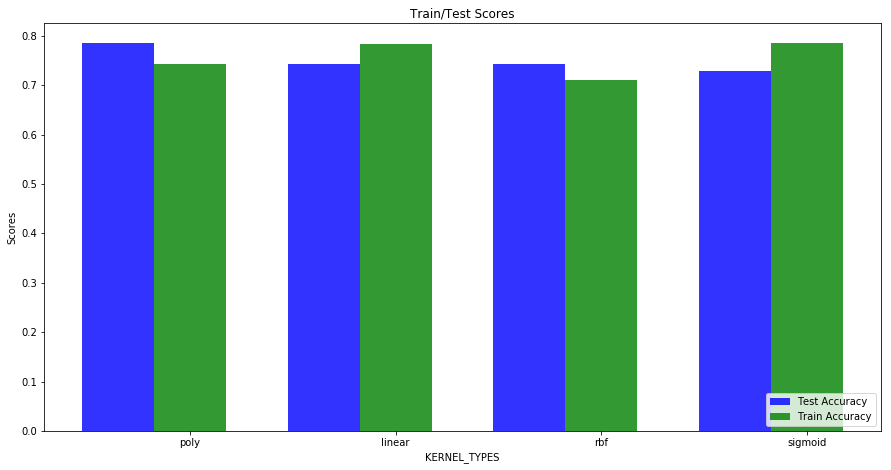

In [116]:
"""


plt.figure(figsize=(15,7.5))
#comment the figure sizeif you want a small figure size
plt.plot(range(length),mean_acc_train,'r')
plt.plot(range(length),mean_acc,'g')
plt.fill_between(range(length),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(length),mean_acc_train - 1 * std_acc_train,mean_acc_train + 1 * std_acc_train, alpha=0.10)


plt.scatter( mean_acc.argmax(),  mean_acc.max())
plt.scatter( mean_acc.argmax(),  mean_acc_train[mean_acc.argmax()])
#plt.annotate("BEST_TEST_ACC", ( mean_acc.argmax()+1,  mean_acc.max()))
#plt.annotate("CORRESPONDING_TRAIN_ACC", ( mean_acc.argmax()+1,  mean_acc_train[mean_acc.argmax()]))

plt.legend(('Train_Accuracy ','Test_Accuracy ', '+/- 3xstd_test','+/- 3xstd_train','BEST_TEST_ACC','CORRESPONDING_TRAIN_ACC'))
plt.ylabel('Accuracy ')
plt.xlabel('TYPE')
plt.tight_layout()
plt.show()

#this plot wasn't that great

"""


print( "The best test accuracy was with", mean_acc.max(), "with Type=", KERNEL_TYPES[mean_acc.argmax()])
print( "The corresponding training accuracy obtained was :",mean_acc_train[mean_acc.argmax()])
#THIS PROVIDES A BETTER VISUALIZATION
# data to plot
n_groups = length


# create plot

fig, ax = plt.subplots(figsize=(15,7.5))
index = np.arange(length)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, mean_acc, bar_width,
alpha=opacity,
color='b',
label='Test Accuracy')

rects2 = plt.bar(index + bar_width, mean_acc_train, bar_width,
alpha=opacity,
color='g',
label='Train Accuracy')


plt.xlabel('KERNEL_TYPES')
plt.ylabel('Scores')
plt.title('Train/Test Scores')
plt.xticks(index + bar_width, KERNEL_TYPES)
plt.legend(loc='lower right')


#plt.tight_layout()
plt.show()

In [117]:
#get the best SVM Classifier out of all
MAX_TYPE=KERNEL_TYPES[mean_acc.argmax()]
clf = svm.SVC(kernel=MAX_TYPE,degree=8,random_state=3)
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
y_pred = clf.predict(X_train)

In [118]:
Train_Scores['SVM-jaccard']=jaccard_similarity_score(y_train, y_pred)
Train_Scores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')
print("Train Scores")
print(Train_Scores)

Test_Scores['SVM-jaccard']=jaccard_similarity_score(y_test, yhat)
Test_Scores['SVM-f1-score']=f1_score(y_test, yhat, average='weighted')
print("Test Scores")
print(Test_Scores)

Train Scores
{'KNN-jaccard': 0.8079710144927537, 'KNN-f1-score': 0.8000194668761034, 'Tree-f1-score': 0.757416213768116, 'Tree-jaccard': 0.7463768115942029, 'SVM-jaccard': 0.7862318840579711, 'SVM-f1-score': 0.7276024980330089}
Test Scores
{'KNN-jaccard': 0.7857142857142857, 'KNN-f1-score': 0.7766540244416351, 'Tree-f1-score': 0.6445993031358885, 'Tree-jaccard': 0.6142857142857143, 'SVM-jaccard': 0.7285714285714285, 'SVM-f1-score': 0.6806722689075629}


              precision    recall  f1-score   support

  COLLECTION       0.17      0.07      0.10        15
     PAIDOFF       0.78      0.91      0.84        55

   micro avg       0.73      0.73      0.73        70
   macro avg       0.47      0.49      0.47        70
weighted avg       0.65      0.73      0.68        70

Confusion matrix, without normalization
[[50  5]
 [14  1]]


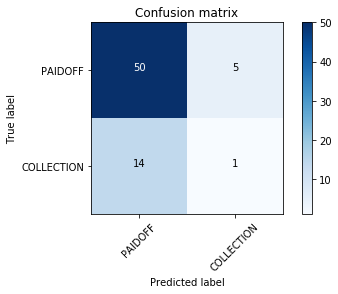

In [119]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=target_labels)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_labels,normalize= False,  title='Confusion matrix')

In [120]:
#MODEL RECONSTRUCTION ON FULL DATASET
MAX_TYPE=KERNEL_TYPES[mean_acc.argmax()]
clf = svm.SVC(kernel=MAX_TYPE,degree=8,random_state=3)
clf.fit(X_full, y_full)
#yhat = clf.predict(X_test)
#y_pred = clf.predict(X_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=3,
  shrinking=True, tol=0.001, verbose=False)

# Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

SOLVERS=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

length=len(SOLVERS)
mean_acc = np.zeros(length)
mean_acc_train= np.zeros(length)
std_acc = np.zeros(length)
std_acc_train = np.zeros(length)
ConfustionMx = []
for n in range(length):
    solver=SOLVERS[n]
    #Train Model and Predict  
    LR = LogisticRegression(C=0.01, solver=solver)
    LR.fit(X_train, y_train)
    yhat = LR.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) #gets the test accuracy
    y_pred=LR.predict(X_train)
    mean_acc_train[n-1] = metrics.accuracy_score(y_train,y_pred) #gets the train accuracy
    
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    std_acc_train[n-1]=np.std(y_pred==y_train)/np.sqrt(y_pred.shape[0])



In [122]:
print("MEAN ACCURACY")
length=len(list(mean_acc))
for i in range(length):
    test_acc='{0:.3f}'.format(round(mean_acc[i],3))
    train_acc='{0:.3f}'.format(round(mean_acc_train[i],3))
    
    print("TYPE=",SOLVERS[i],"  Avg. Test Accuracy=",test_acc,"  Avg. Train Accuracy=",train_acc) 


MEAN ACCURACY
TYPE= newton-cg   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.743
TYPE= lbfgs   Avg. Test Accuracy= 0.686   Avg. Train Accuracy= 0.757
TYPE= liblinear   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.743
TYPE= sag   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.743
TYPE= saga   Avg. Test Accuracy= 0.786   Avg. Train Accuracy= 0.743


The best test accuracy was with 0.7857142857142857 with Type= newton-cg
The corresponding training accuracy obtained was : 0.7427536231884058


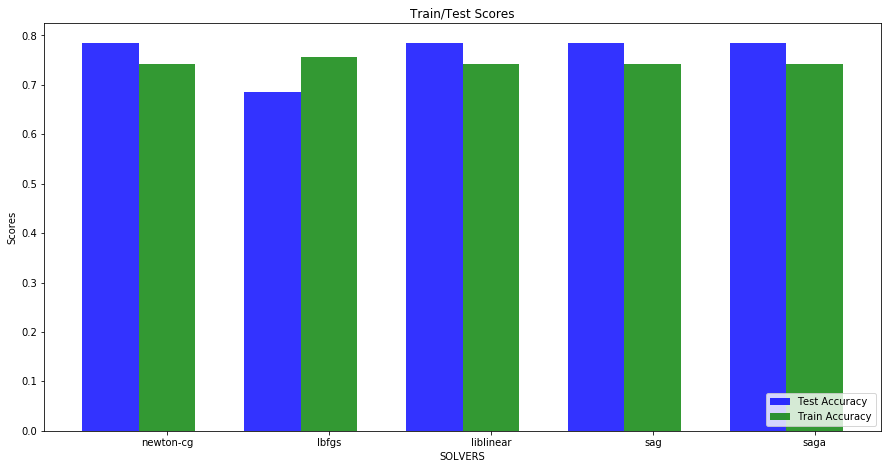

In [123]:
"""


plt.figure(figsize=(15,7.5))
#comment the figure sizeif you want a small figure size
plt.plot(range(length),mean_acc_train,'r')
plt.plot(range(length),mean_acc,'g')
plt.fill_between(range(length),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(length),mean_acc_train - 1 * std_acc_train,mean_acc_train + 1 * std_acc_train, alpha=0.10)


plt.scatter( mean_acc.argmax(),  mean_acc.max())
plt.scatter( mean_acc.argmax(),  mean_acc_train[mean_acc.argmax()])
#plt.annotate("BEST_TEST_ACC", ( mean_acc.argmax()+1,  mean_acc.max()))
#plt.annotate("CORRESPONDING_TRAIN_ACC", ( mean_acc.argmax()+1,  mean_acc_train[mean_acc.argmax()]))

plt.legend(('Train_Accuracy ','Test_Accuracy ', '+/- 3xstd_test','+/- 3xstd_train','BEST_TEST_ACC','CORRESPONDING_TRAIN_ACC'))
plt.ylabel('Accuracy ')
plt.xlabel('SOLVER')
plt.tight_layout()
plt.show()

#this plot wasn't so great
"""

print( "The best test accuracy was with", mean_acc.max(), "with Type=", SOLVERS[mean_acc.argmax()])
print( "The corresponding training accuracy obtained was :",mean_acc_train[mean_acc.argmax()])

#THIS PROVIDES A BETTER VISUALIZATION
# data to plot
n_groups = length


# create plot

fig, ax = plt.subplots(figsize=(15,7.5))
index = np.arange(length)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, mean_acc, bar_width,
alpha=opacity,
color='b',
label='Test Accuracy')

rects2 = plt.bar(index + bar_width, mean_acc_train, bar_width,
alpha=opacity,
color='g',
label='Train Accuracy')


plt.xlabel('SOLVERS')
plt.ylabel('Scores')
plt.title('Train/Test Scores')
plt.xticks(index + bar_width, SOLVERS)
plt.legend(loc='lower right')


#plt.tight_layout()
plt.show()

In [127]:
#get the best LR Classifier out of all
BEST_TYPE=SOLVERS[mean_acc.argmax()]
solver=BEST_TYPE
#Train Model and Predict  
LR = LogisticRegression(C=0.01, solver=solver)
LR.fit(X_train, y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
y_pred = LR.predict(X_train)

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        15
     PAIDOFF       0.79      1.00      0.88        55

   micro avg       0.79      0.79      0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[55  0]
 [15  0]]


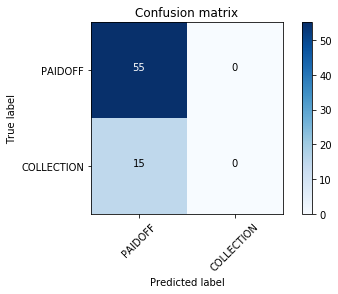

In [128]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=target_labels)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_labels,normalize= False,  title='Confusion matrix')

In [129]:
y_pred=LR.predict(X_train)
y_pred_prob=LR.predict_proba(X_train)
Train_Scores['LogReg-jaccard']=jaccard_similarity_score(y_train, y_pred)
Train_Scores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
Train_Scores['LogReg-logLoss']=log_loss(y_train, y_pred_prob)
print("Train Scores")
print(Train_Scores)
yhat=LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
Test_Scores['LogReg-jaccard']=jaccard_similarity_score(y_test, yhat)
Test_Scores['LogReg-f1-score']=f1_score(y_test, yhat, average='weighted')  
Test_Scores['LogReg-logLoss']=log_loss(y_test, yhat_prob)
print("Test Scores")
print(Test_Scores)

Train Scores
{'KNN-jaccard': 0.8079710144927537, 'KNN-f1-score': 0.8000194668761034, 'Tree-f1-score': 0.757416213768116, 'Tree-jaccard': 0.7463768115942029, 'SVM-jaccard': 0.7862318840579711, 'SVM-f1-score': 0.7276024980330089, 'LogReg-jaccard': 0.7427536231884058, 'LogReg-f1-score': 0.6331163939859591, 'LogReg-logLoss': 0.4985234591483458}
Test Scores
{'KNN-jaccard': 0.7857142857142857, 'KNN-f1-score': 0.7766540244416351, 'Tree-f1-score': 0.6445993031358885, 'Tree-jaccard': 0.6142857142857143, 'SVM-jaccard': 0.7285714285714285, 'SVM-f1-score': 0.6806722689075629, 'LogReg-jaccard': 0.7857142857142857, 'LogReg-f1-score': 0.6914285714285714, 'LogReg-logLoss': 0.4920178014679269}


In [134]:
#MODEL RECONSTRUCTION
#get the best LR Classifier out of all and train it on the full dataset
BEST_TYPE=SOLVERS[mean_acc.argmax()]
solver=BEST_TYPE
#Train Model and Predict  
LR = LogisticRegression(C=0.01, solver=solver)
LR.fit(X_full, y_full)
#yhat = LR.predict(X_test)
#yhat_prob = LR.predict_proba(X_test)
#y_pred = LR.predict(X_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

# Model Evaluation using Test set

In [130]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [131]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-09 21:09:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-09 21:09:02 (384 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [210]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [211]:
## Preprocessing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
testX = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
print(testX.shape)
testX[0:5]



(54, 8)


array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ,  2.4 , -0.8 , -0.86],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77, -0.42, -0.8 , -0.86],
       [ 0.49,  0.93,  1.88,  1.98,  0.77, -0.42,  1.25, -0.86],
       [ 0.49,  0.93, -0.98, -0.51,  0.77, -0.42, -0.8 ,  1.16],
       [-0.67, -0.79, -0.48, -0.51,  0.77,  2.4 , -0.8 , -0.86]])

In [212]:
testy = test_df['loan_status'].values
print(testy.shape)
testy[0:5]

(54,)


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [213]:
MAINScores={}

In [217]:
knn_pred=neigh.predict(testX)
MAINScores['KNN-jaccard']=jaccard_similarity_score(testy, knn_pred)
MAINScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')  
print("KNN Accuracy :",metrics.accuracy_score(testy,knn_pred))

tree_pred=loanTree.predict(testX)
MAINScores['Tree-jaccard']=jaccard_similarity_score(testy, tree_pred)
MAINScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted') 
print("TREE Accuracy :",metrics.accuracy_score(testy,tree_pred))

svm_pred=clf.predict(testX)
MAINScores['SVM-jaccard']=jaccard_similarity_score(testy, svm_pred)
MAINScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted') 
print("SVM Accuracy :",metrics.accuracy_score(testy,svm_pred))

log_pred=LR.predict(testX)
proba=LR.predict_proba(testX)
MAINScores['LogReg-jaccard']=jaccard_similarity_score(testy, log_pred)
MAINScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
MAINScores['LogReg-logLoss']=log_loss(testy, proba)
print("LR Accuracy :",metrics.accuracy_score(testy,log_pred))

#print(tree_pred==log_pred)
#print(tree_pred==knn_pred)
#print(tree_pred==svm_pred)

KNN Accuracy : 0.7407407407407407
TREE Accuracy : 0.7407407407407407
SVM Accuracy : 0.7407407407407407
LR Accuracy : 0.7407407407407407


In [215]:
#cant believe this!!!
#scroll to end of notebook to know why

In [218]:
def print_dict(new_dict):
    #print ("Dictionary is :  ")  
    #print("keys: values") 
    for i in new_dict:
        print(i, " :", round(new_dict[i],3))
print("TRAIN SCORES")
print_dict(Train_Scores)
print("TEST SCORES")
print_dict(MAINScores)


TRAIN SCORES
KNN-jaccard  : 0.808
KNN-f1-score  : 0.8
Tree-f1-score  : 0.757
Tree-jaccard  : 0.746
SVM-jaccard  : 0.786
SVM-f1-score  : 0.728
LogReg-jaccard  : 0.743
LogReg-f1-score  : 0.633
LogReg-logLoss  : 0.499
TEST SCORES
KNN-jaccard  : 0.741
KNN-f1-score  : 0.63
Tree-jaccard  : 0.741
Tree-f1-score  : 0.63
SVM-jaccard  : 0.741
SVM-f1-score  : 0.63
LogReg-jaccard  : 0.741
LogReg-f1-score  : 0.63
LogReg-logLoss  : 0.647


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.741       | 0.63        | NA      |
| Decision Tree      | 0.741       | 0.63        | NA      |
| SVM                | 0.741       | 0.63        | NA      |
| LogisticRegression | 0.741       | 0.63        | 0.647       |

In [ ]:
#the report seems stfrikingly similar
#why??
#i dont think there is any coding error or so.
#one possible explanation is that the best model from each category was well
#evaluated and resulted in mapping the same functions
#it learned well and is evaluating correctly
#another is that our course instructor , sir saeed azhaborgi,
#used a direct function to evaluate the target label in his provided data
#and the algorithms learned this direct function mapping and are now predicting very similar data

#still not convinced??? Look at the next cells to understand what im trying to say

In [220]:
#lets try to make a random array and try classification on that
testX=np.random.normal(4,58,(54, 8))
import random

testy=[]
for i in range(54):
    ch=random.choice(target_labels)
    testy.append(ch)
testy = np.asarray(testy) 
testy.shape

(54,)

In [221]:
knn_pred=neigh.predict(testX)
MAINScores['KNN-jaccard']=jaccard_similarity_score(testy, knn_pred)
MAINScores['KNN-f1-score']=f1_score(testy, knn_pred, average='weighted')  
print("KNN Accuracy :",metrics.accuracy_score(testy,knn_pred))

tree_pred=loanTree.predict(testX)
MAINScores['Tree-jaccard']=jaccard_similarity_score(testy, tree_pred)
MAINScores['Tree-f1-score']=f1_score(testy, tree_pred, average='weighted') 
print("TREE Accuracy :",metrics.accuracy_score(testy,tree_pred))

svm_pred=clf.predict(testX)
MAINScores['SVM-jaccard']=jaccard_similarity_score(testy, svm_pred)
MAINScores['SVM-f1-score']=f1_score(testy, svm_pred, average='weighted') 
print("SVM Accuracy :",metrics.accuracy_score(testy,svm_pred))

log_pred=LR.predict(testX)
proba=LR.predict_proba(testX)
MAINScores['LogReg-jaccard']=jaccard_similarity_score(testy, log_pred)
MAINScores['LogReg-f1-score']=f1_score(testy, log_pred, average='weighted')  
MAINScores['LogReg-logLoss']=log_loss(testy, proba)
print("LR Accuracy :",metrics.accuracy_score(testy,log_pred))

print(tree_pred==log_pred)
print(tree_pred==knn_pred)
print(tree_pred==svm_pred)

KNN Accuracy : 0.6111111111111112
TREE Accuracy : 0.5740740740740741
SVM Accuracy : 0.6111111111111112
LR Accuracy : 0.5185185185185185
[False False  True  True  True  True False False  True  True  True False
 False  True False  True  True  True  True  True False  True  True  True
  True  True  True  True  True False False False  True  True  True  True
 False  True False  True False  True  True  True False False  True False
 False  True False  True  True  True]
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  Tr

In [222]:
print("TEST SCORES")
print_dict(MAINScores)

TEST SCORES
KNN-jaccard  : 0.611
KNN-f1-score  : 0.464
Tree-jaccard  : 0.574
Tree-f1-score  : 0.446
SVM-jaccard  : 0.611
SVM-f1-score  : 0.464
LogReg-jaccard  : 0.519
LogReg-f1-score  : 0.519
LogReg-logLoss  : 5.785


In [ ]:
#this dataset is now completely random and indeed the models giveout different scores!!

#if you have another theory do email me or contact me!
#Email-njrfarhandasilva10@gmail.com
#Contact-+917464027555
#Instagram-i.am.the.swagger
#Kudos!

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>